Análisis Exploratorio sobre el precio de venta de autos en EEUU buscando identificar las variables que mas infieren sobre el precio, y también realizar un modelo de regresión lineal que busque predecir los precios teniendo en cuenta estas variables significativas.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('.\datasets\car_prices.csv')

Qué variables tienen un mayor impacto en el precio del auto?

In [5]:
raw_data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


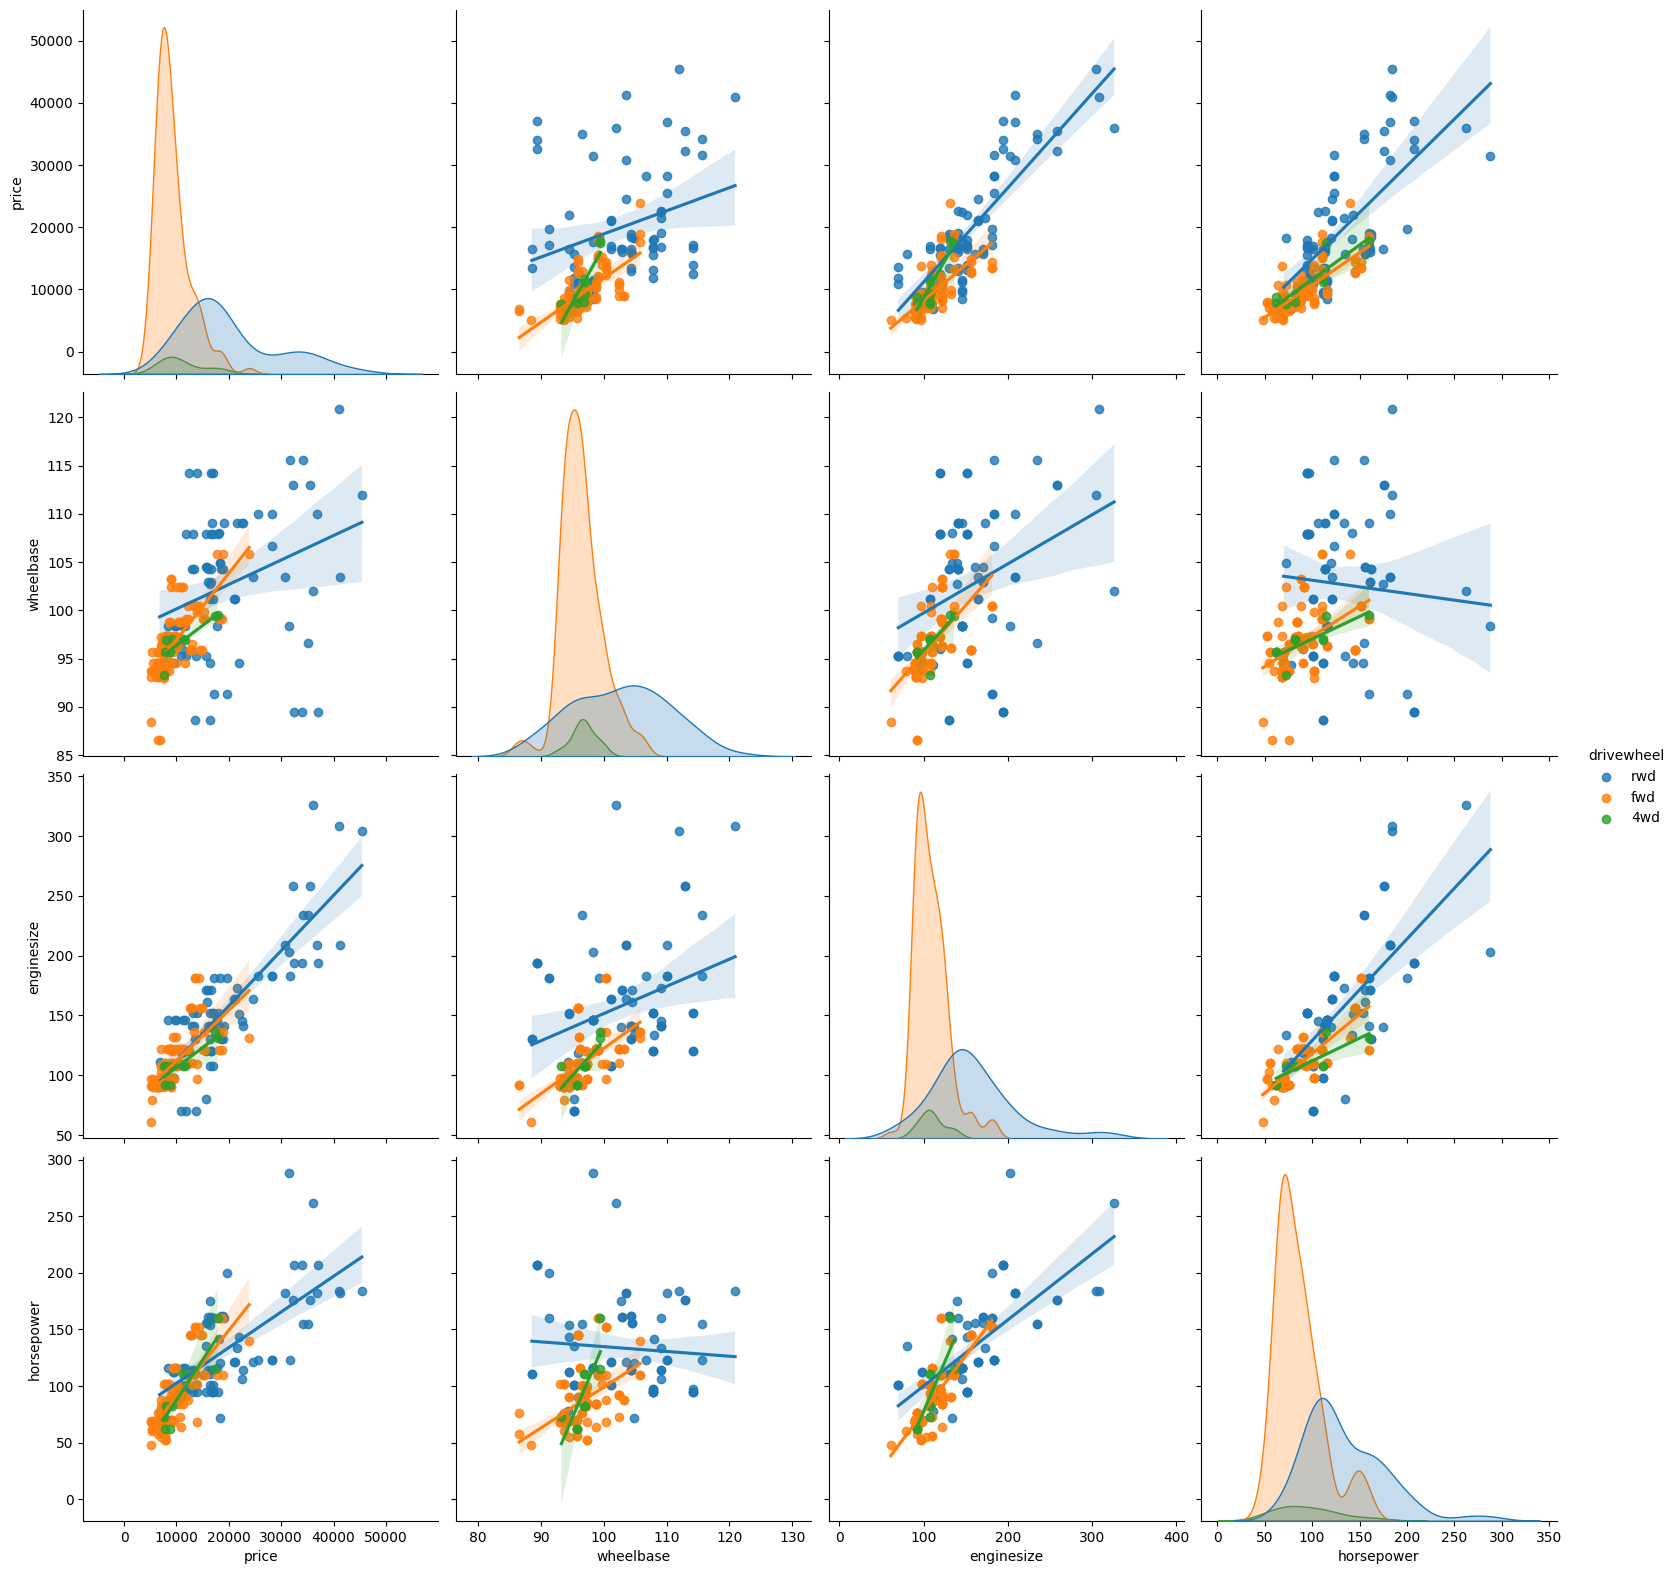

In [8]:
# Variables importantes
sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize', 'horsepower', 'drivewheel']], hue='drivewheel', height = 4, kind='reg')

[Text(0, 0, '21890.5'),
 Text(0, 0, '10376.7'),
 Text(0, 0, '14344.3'),
 Text(0, 0, '12372'),
 Text(0, 0, '22208.5')]

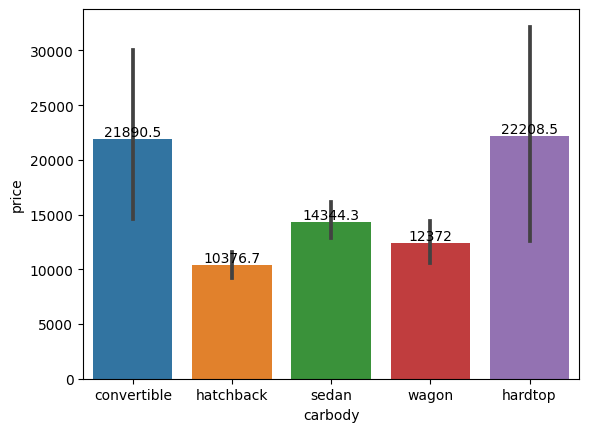

In [9]:
ax = sns.barplot(x='carbody', y='price', data=raw_data)
ax.bar_label(ax.containers[0])

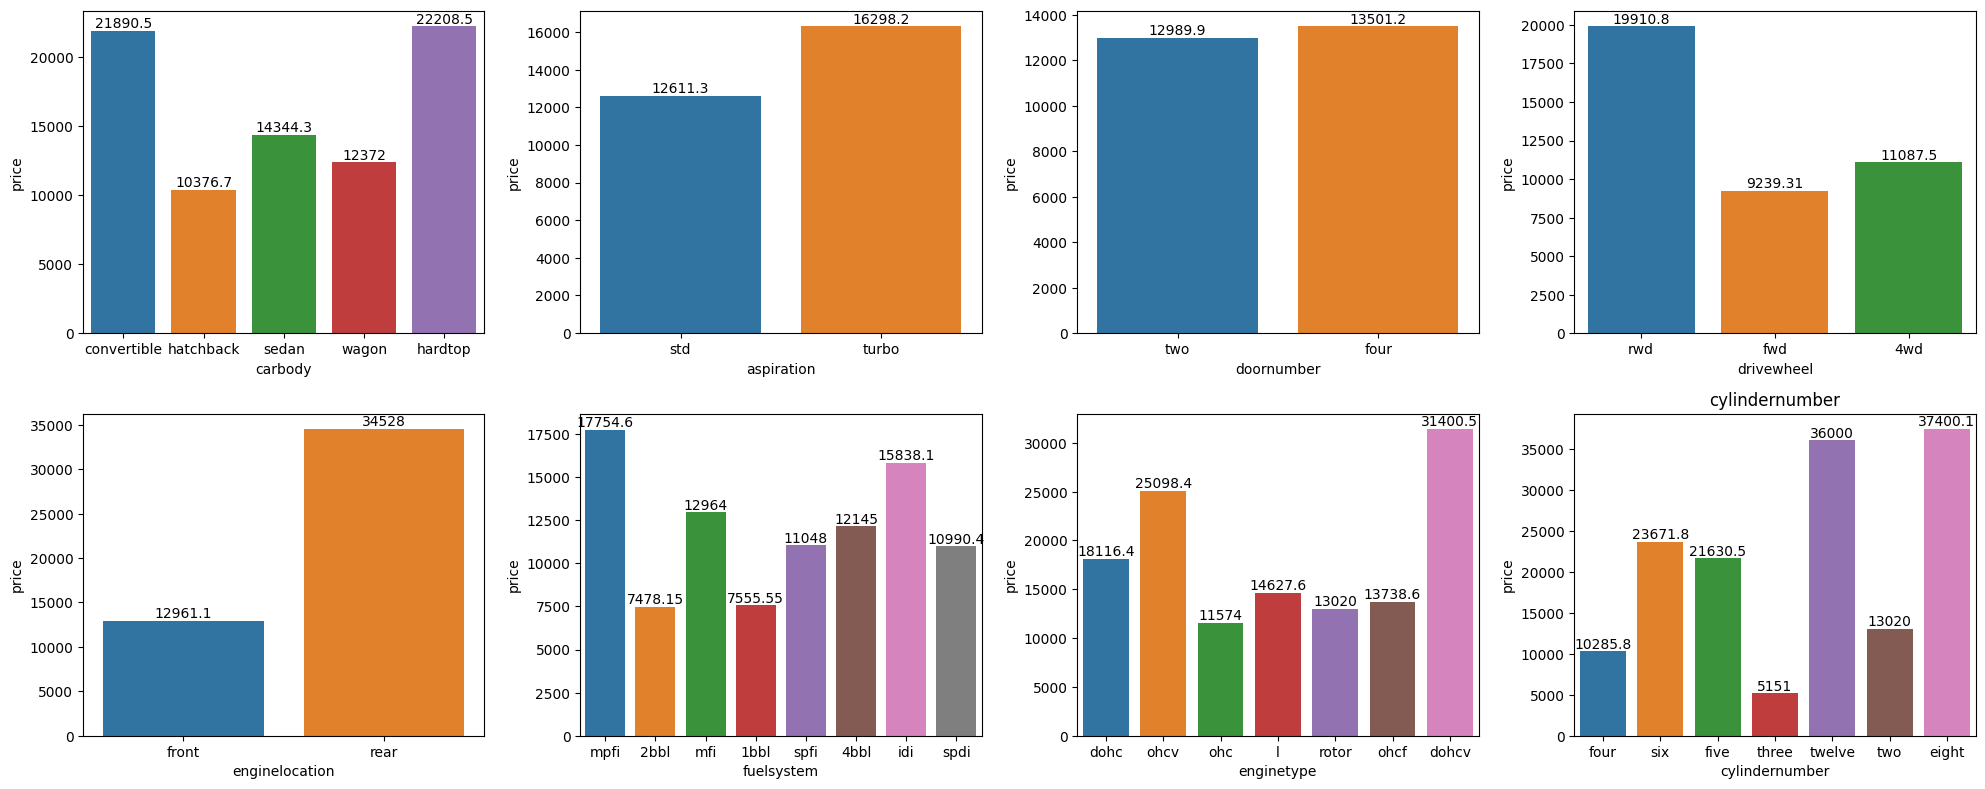

In [10]:
categories = ['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
axs = axs.ravel()

for c in categories:
    ax = sns.barplot(x=c, y='price', data=raw_data, ci=False, ax=axs[categories.index(c)])
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)

plt.tight_layout()
plt.show()


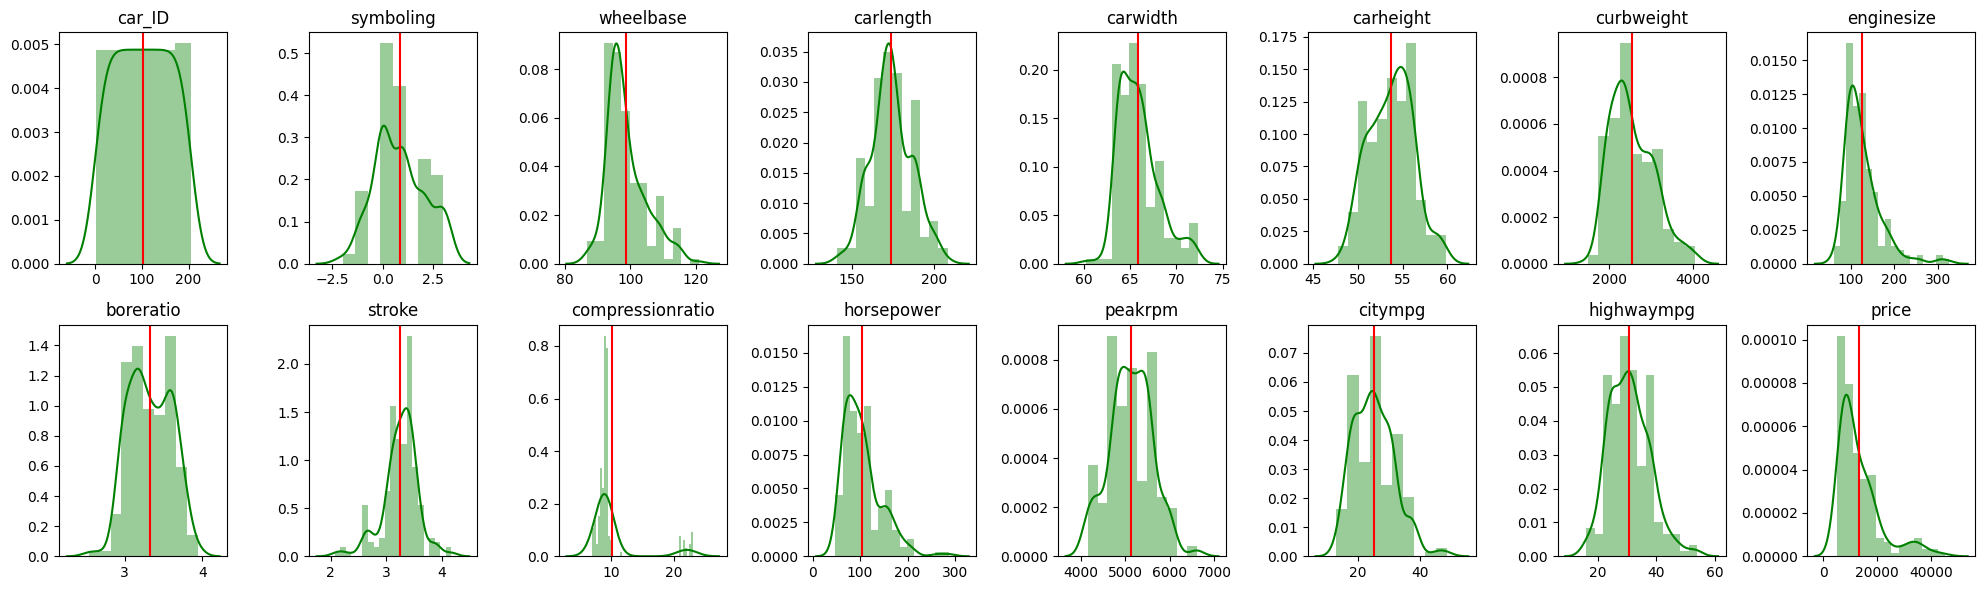

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(20,6))
axs = axs.ravel()

variables = raw_data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

for n in variables:
    x = raw_data[n].values
    ax = axs[variables.get_loc(n)]
    sns.distplot(x, color='g', ax=ax)
    mean = raw_data[n].mean()
    ax.axvline(mean, 0, 1, color = 'r')
    ax.set_ylabel('')
    ax.set_title(n)

plt.tight_layout()
plt.show()

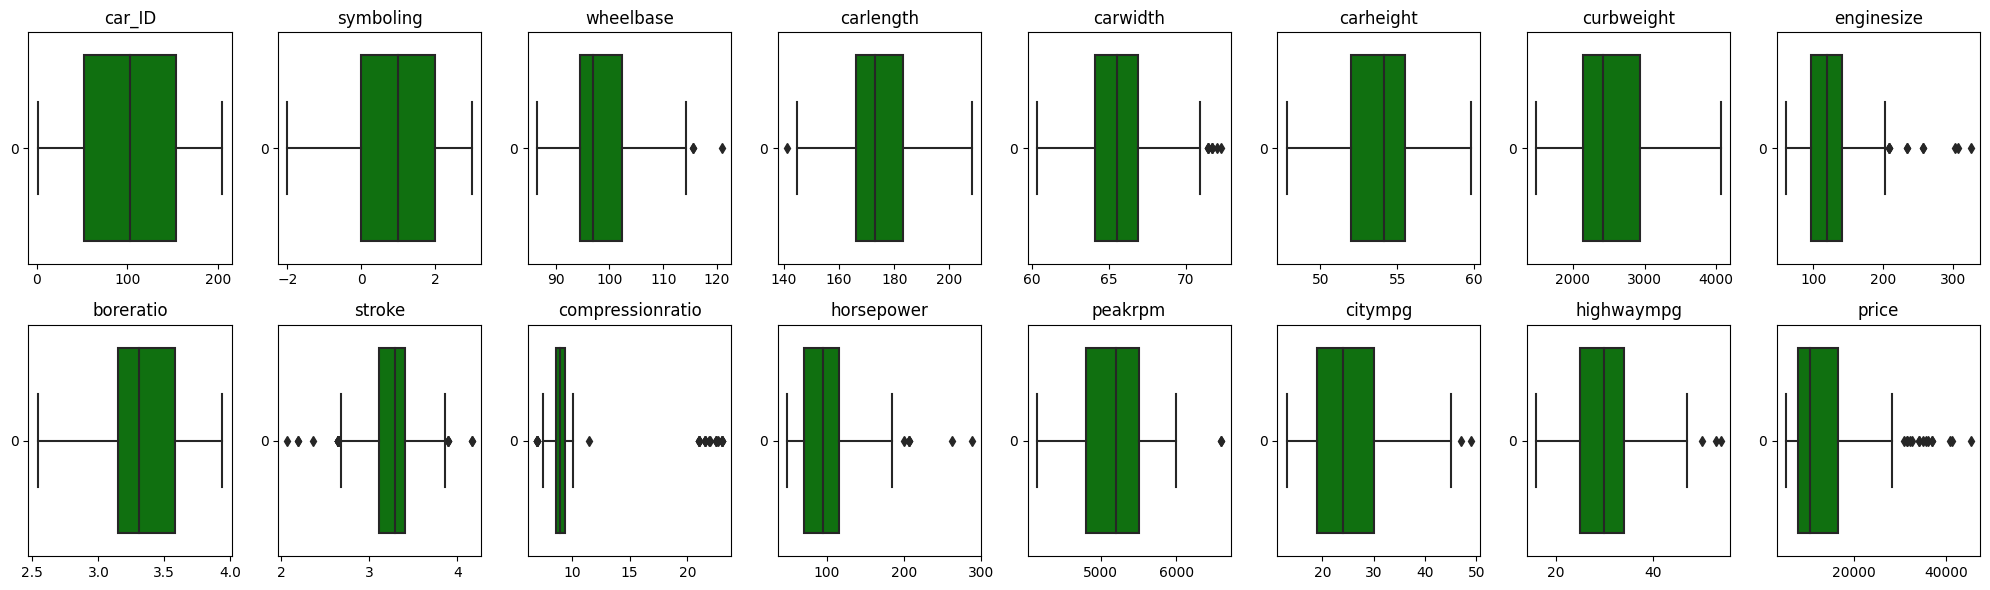

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(20,6))
axs = axs.ravel()

variables = raw_data.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

for n in variables:
    x = raw_data[n].values
    ax = axs[variables.get_loc(n)]
    sns.boxplot(x, color='g', ax=ax, orient='h')
    ax.set_ylabel('')
    ax.set_title(n)

plt.tight_layout()
plt.show()

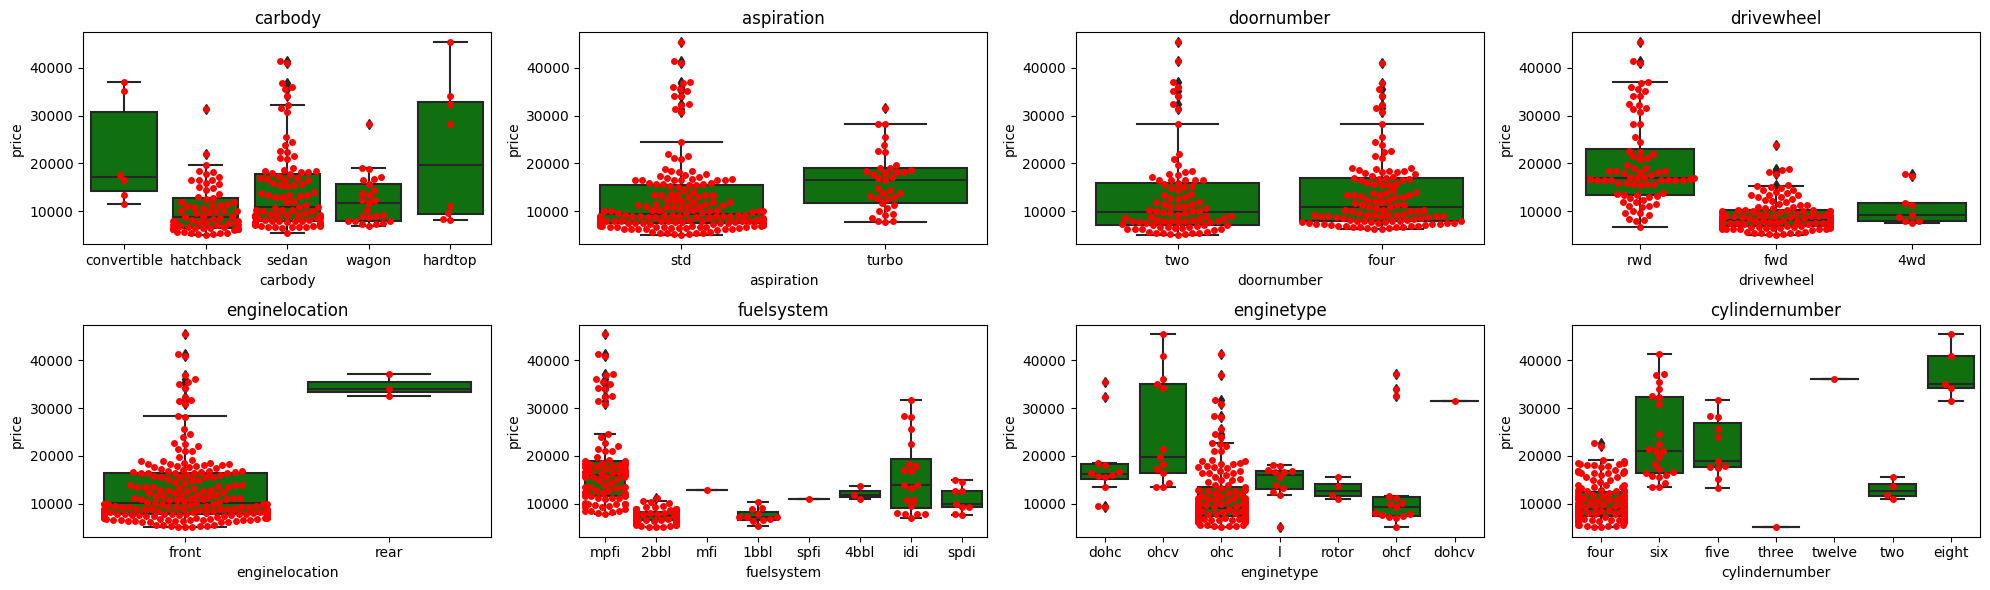

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,6))
axs = axs.ravel()

for c in categories:
    i = axs[categories.index(c)]
    sns.boxplot(x=c, y='price', data=raw_data, color='g', ax=i)
    sns.swarmplot(x=c, y='price', data=raw_data, color='r', ax=i)
    i.set_title(c)

plt.tight_layout()
plt.show()

Cambiamos valores de texto a numéricos

In [17]:
new_raw_data = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'two'] = 2
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'three'] = 3
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'four'] = 4
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'five'] = 5
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'six'] = 6
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'eight'] = 8
new_raw_data['cylindernumber'].loc[new_raw_data['cylindernumber'] == 'twelve'] = 12
new_raw_data['cylindernumber'] = new_raw_data['cylindernumber'].astype(int)

In [18]:
del new_raw_data['CarName']

<AxesSubplot:>

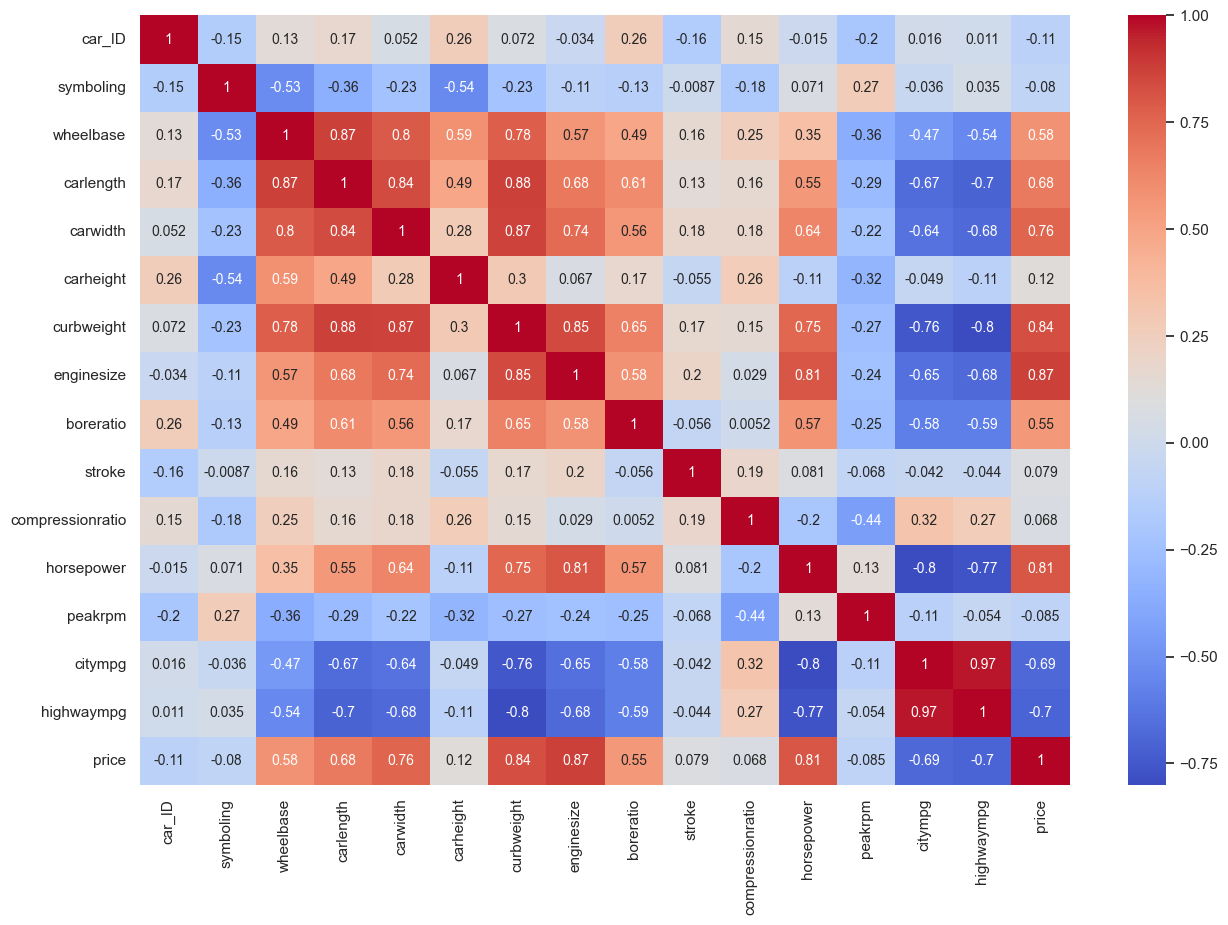

In [29]:
sns.set(rc={'figure.figsize':(15,10)})

vars = ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
        'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[vars].corr(method='pearson')

sns.heatmap(pc, annot=True, yticklabels=vars, xticklabels=vars, annot_kws={'size':10}, cmap='coolwarm')


Feature Importance

In [30]:
x = new_raw_data.drop(['price'], axis=1).values
x_columns = new_raw_data.drop(['price'], axis=1)
y = new_raw_data['price'].astype(int)

print(x.shape)
print(y.shape)

(205, 47)
(205,)


In [31]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=15, criterion= 'entropy', max_depth=10)
dt.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [36]:
dt.feature_importances_

array([0.06709744, 0.00836196, 0.10628199, 0.05797326, 0.03906812,
       0.11069647, 0.24115026, 0.00178623, 0.05316757, 0.00496111,
       0.01631418, 0.00885142, 0.09456605, 0.01426826, 0.01443607,
       0.04866888, 0.        , 0.00567654, 0.01141783, 0.00129677,
       0.00965873, 0.00129677, 0.0122833 , 0.01790168, 0.00665545,
       0.        , 0.00968976, 0.00389031, 0.00389031, 0.        ,
       0.        , 0.00493398, 0.        , 0.00839299, 0.        ,
       0.003083  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00968976, 0.        , 0.        , 0.        ,
       0.        , 0.00259354])

In [ ]:
# Calculamos la FI
for i, column in enumerate(new_raw_data.drop('price', axis=1)):
    fi = pd.DataFrame({'Variable': [column], 'FI Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

final_fi = final_fi.sort_values('FI Score', ascending = False).reset_index()

In [44]:
final_fi.head()

,index,Variable,FI Score
0,6,curbweight,0.241150
1,5,carheight,0.110696
2,2,wheelbase,0.106282
3,12,horsepower,0.094566
4,0,car_ID,0.067097


Separamos la data para el análisis de Regresión Lineal

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, test_size=0.2, random_state=15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 47)
(41, 47)
(164,)
(41,)


In [46]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)

y_predicted = lr.predict(x_train)

In [52]:
print(f'El modelo explica un {lr.score(x_train, y_train):.2f} de la data entrenada y un {lr.score(x_test, y_test):.2f} de la data de testeo.')
print(f'La precisión de R cuadrado indica que tan cerca están los datos de la línea de regresión, en este modelo un {lr.score(x_test, y_test):.2f}')
print(f'La desviación estandar del dataset entrenado es de {sqrt(mean_squared_error(y_train, y_predicted)):.2f} y del dataset de testeo, de {sqrt(mean_squared_error(y_test, lr.predict(x_test))):.2f}.')

El modelo explica un 0.94 de la data entrenada y un 0.85 de la data de testeo.
La precisión de R cuadrado indica que tan cerca están los datos de la línea de regresión, en este modelo un 0.85
La desviación estandar del dataset entrenado es de 1943.85 y del dataset de testeo, de 3224.52.


Text(0.5, 1.0, 'Actuals vs Predicted Values')

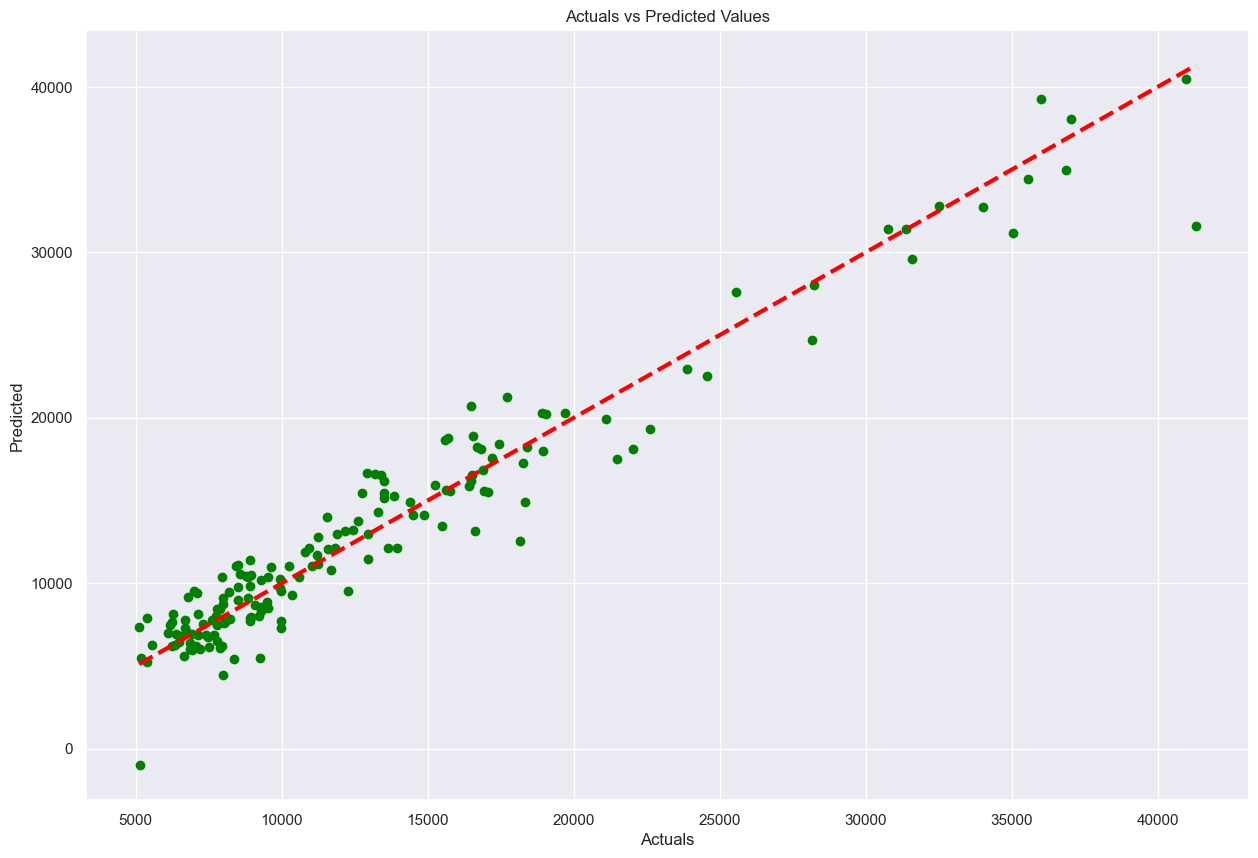

In [56]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))
plt.scatter(y_train, y_predicted, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted')
plt.title('Actuals vs Predicted Values')